In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('Palladium.csv')
df.head(5)

,Open,Close,High,Low,Date
0,1067.5,1067.5,1067.5,1067.5,1/1/2018
1,1066.5,1096.0,1099.0,1066.0,1/2/2018
2,1095.5,1088.0,1097.0,1084.0,1/3/2018
3,1086.5,1102.5,1108.5,1083.5,1/4/2018
4,1100.0,1091.5,1103.0,1086.5,1/5/2018


In [3]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)

# Sắp xếp lại index
df = df.sort_index(ascending=False)
df.head(5)

,Open,Close,High,Low,Date
2109,914.5,914.5,914.5,914.5,2024-06-01
2108,949.5,914.5,956.0,903.5,2024-05-31
2107,957.0,950.5,962.0,932.5,2024-05-30
2106,982.5,968.0,983.0,946.5,2024-05-29
2105,995.5,975.5,997.0,969.5,2024-05-28


In [4]:
df1=df.reset_index()['Close']
df1

0        914.5
1        914.5
2        950.5
3        968.0
4        975.5
         ...  
2105    1091.5
2106    1102.5
2107    1088.0
2108    1096.0
2109    1067.5
Name: Close, Length: 2110, dtype: float64

In [5]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [7]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [9]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [10]:
# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\admin\anaconda3\envs\py39env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1273
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0077
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0045
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0042
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0029
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0024
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0020
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0015
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0014
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0013
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0011
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0011
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0010
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.8250e-04
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step 

In [12]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [13]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [14]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = mean_absolute_percentage_error(y_pred, ytest)
print('Testing MAPE:', test_mape)

#MSE
test_mse = mean_squared_error(y_pred, ytest)
print('Testing MSE:', test_mse)

Testing RMSE: 1040.9335928163814
Testing MAPE: 0.9999217684441032
Testing MSE: 1083532.4705288005


In [15]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.04502573 0.0521012  0.05596055 0.05596055 0.06067753 0.05767581
 0.05617496 0.05917667 0.07825901 0.08018868 0.07825901 0.08211835
 0.07161235 0.06796741 0.06153516 0.06153516 0.0521012  0.0521012
 0.04674099 0.03709262 0.02444254 0.02637221 0.03494854 0.03709262
 0.03923671 0.04652659 0.04652659 0.05338765 0.05553173 0.05596055
 0.05617496 0.05703259 0.06024871 0.0623928  0.05917667 0.0623928
 0.06496569 0.06475129 0.06153516 0.0626072  0.0626072  0.05789022
 0.0651801  0.06582333 0.05746141 0.05381647 0.06024871 0.05960549
 0.06582333 0.06303602 0.0623928  0.08533448 0.0834048  0.09240995
 0.08640652 0.08662093 0.08319039 0.0754717  0.08126072 0.08168954
 0.08726415 0.08512007 0.07461407 0.06710978 0.06089194 0.05939108
 0.05703259 0.05660377 0.05102916 0.06089194 0.07204117 0.08190395
 0.08704974 0.0885506  0.08404803 0.07911664 0.09048027 0.10548885
 0.10591767 0.10591767 0.1093482  0.11427959 0.10634648 0.10806175
 0.11256432 0.11256432 0.10956261 0.11749571 0.10720

In [16]:
# 13. Dự báo 60 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
n_steps=100
i=0
while(i<60):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1


0 day input [0.04502573 0.0521012  0.05596055 0.05596055 0.06067753 0.05767581
 0.05617496 0.05917667 0.07825901 0.08018868 0.07825901 0.08211835
 0.07161235 0.06796741 0.06153516 0.06153516 0.0521012  0.0521012
 0.04674099 0.03709262 0.02444254 0.02637221 0.03494854 0.03709262
 0.03923671 0.04652659 0.04652659 0.05338765 0.05553173 0.05596055
 0.05617496 0.05703259 0.06024871 0.0623928  0.05917667 0.0623928
 0.06496569 0.06475129 0.06153516 0.0626072  0.0626072  0.05789022
 0.0651801  0.06582333 0.05746141 0.05381647 0.06024871 0.05960549
 0.06582333 0.06303602 0.0623928  0.08533448 0.0834048  0.09240995
 0.08640652 0.08662093 0.08319039 0.0754717  0.08126072 0.08168954
 0.08726415 0.08512007 0.07461407 0.06710978 0.06089194 0.05939108
 0.05703259 0.05660377 0.05102916 0.06089194 0.07204117 0.08190395
 0.08704974 0.0885506  0.08404803 0.07911664 0.09048027 0.10548885
 0.10591767 0.10591767 0.1093482  0.11427959 0.10634648 0.10806175
 0.11256432 0.11256432 0.10956261 0.11749571 0.10720

In [17]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1


0 day input [0.04502573 0.0521012  0.05596055 0.05596055 0.06067753 0.05767581
 0.05617496 0.05917667 0.07825901 0.08018868 0.07825901 0.08211835
 0.07161235 0.06796741 0.06153516 0.06153516 0.0521012  0.0521012
 0.04674099 0.03709262 0.02444254 0.02637221 0.03494854 0.03709262
 0.03923671 0.04652659 0.04652659 0.05338765 0.05553173 0.05596055
 0.05617496 0.05703259 0.06024871 0.0623928  0.05917667 0.0623928
 0.06496569 0.06475129 0.06153516 0.0626072  0.0626072  0.05789022
 0.0651801  0.06582333 0.05746141 0.05381647 0.06024871 0.05960549
 0.06582333 0.06303602 0.0623928  0.08533448 0.0834048  0.09240995
 0.08640652 0.08662093 0.08319039 0.0754717  0.08126072 0.08168954
 0.08726415 0.08512007 0.07461407 0.06710978 0.06089194 0.05939108
 0.05703259 0.05660377 0.05102916 0.06089194 0.07204117 0.08190395
 0.08704974 0.0885506  0.08404803 0.07911664 0.09048027 0.10548885
 0.10591767 0.10591767 0.1093482  0.11427959 0.10634648 0.10806175
 0.11256432 0.11256432 0.10956261 0.11749571 0.10720

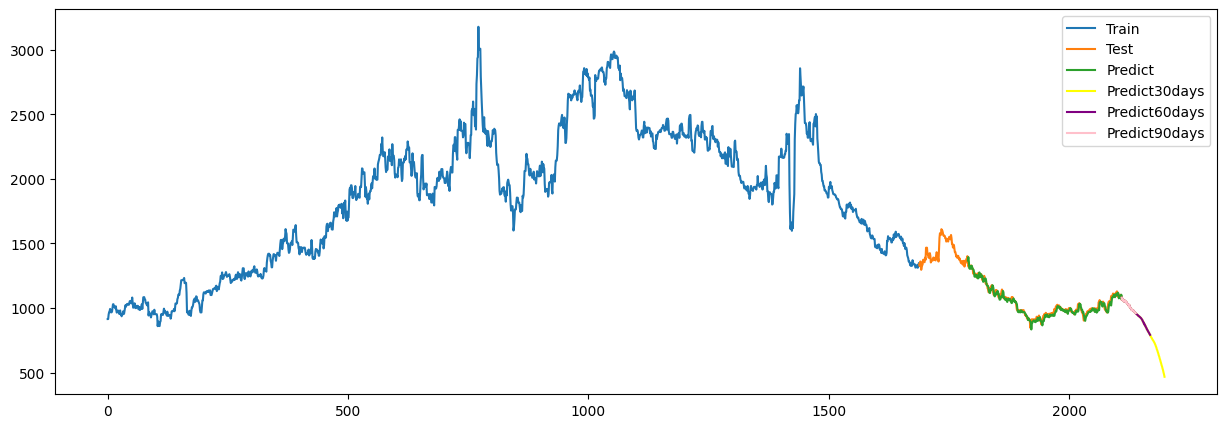

In [18]:
# 14.Vẽ hình
plt.figure(figsize=(15,5))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_90days_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_90days_data_index,scaler.inverse_transform(lst_output_90), color='yellow')

prediect_60days_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_60days_data_index,scaler.inverse_transform(lst_output_60), color='purple')

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output), color='pink')

plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.show()